## Step 1 : Import necessary packages

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load dataset

In [2]:
# Loading dataset

df = pd.read_csv("/content/drive/MyDrive/SigmaData/weightheight.csv")

## Step 3 : Describe dataset

In [3]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
# Dataset statistics

df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
# Dataset sample

df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


## Step 4 : Dataset Distribution

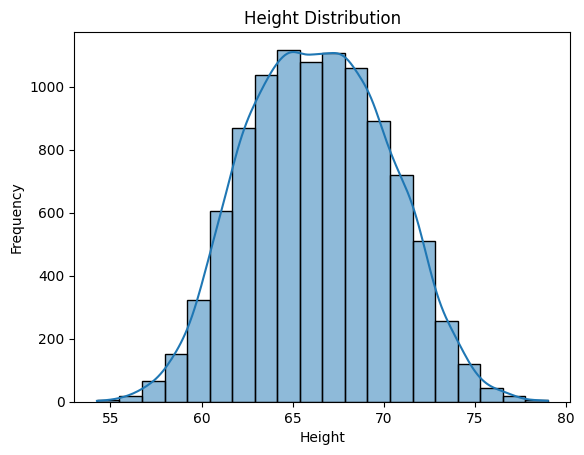

In [6]:
# Dataset histogram plot
# Height distribution

sns.histplot(data=df, x='Height', kde=True, bins=20)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Dataset skew for the variable 'height'

from scipy.stats import skew

print("------------------------------------------------------------------------------------------------------------------------")
print(skew(df['Height']))
print("------------------------------------------------------------------------------------------------------------------------")

# Skew Interpretation
print("------------------------------------------------------------------------------------------------------------------------")
print(f"The skew is : {skew(df['Height']):2f}. The skewness value is very close to 0. This means that the data is nearly symmetric, with minimal distortion.")
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
0.04936168370490536
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The skew is : 0.049362. The skewness value is very close to 0. This means that the data is nearly symmetric, with minimal distortion.
------------------------------------------------------------------------------------------------------------------------


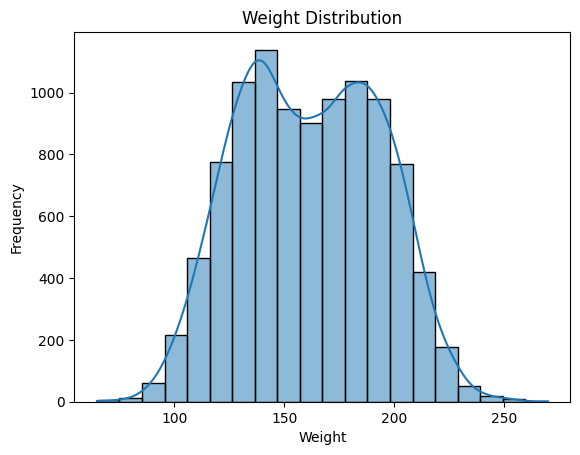

In [8]:
# Dataset histogram plot
# Weight distribution

sns.histplot(data=df, x='Weight', kde=True, bins=20)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Dataset skew for the variable 'weight'

from scipy.stats import skew

print("------------------------------------------------------------------------------------------------------------------------")
print(skew(df['Weight']))
print("------------------------------------------------------------------------------------------------------------------------")

# Skew Interpretation
print("------------------------------------------------------------------------------------------------------------------------")
print(f"The skew is : {skew(df['Weight']):2f}. The skewness value is very close to 0. This means that the data is nearly symmetric, with minimal distortion.")
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
0.032949561064277405
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The skew is : 0.032950. The skewness value is very close to 0. This means that the data is nearly symmetric, with minimal distortion.
------------------------------------------------------------------------------------------------------------------------


## Step 5 : Examine categorical variable

In [10]:
# Examine the variable 'gender'

df_gender = df['Gender'].value_counts()
df_gender

,count
Gender,
Male,5000
Female,5000


## Step 6 : Formulate hypothesis

In [11]:
# Formulating an hypothesis

print("------------------------------------------------------------------------------------------------------------------------")
print("H0: There is no significant relationship between height and weight.")
print("H1: There is a significant relationship between height and weight.")
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
H0: There is no significant relationship between height and weight.
H1: There is a significant relationship between height and weight.
------------------------------------------------------------------------------------------------------------------------


## Step 7 : Checking for normality of distribution

In [12]:
# Checking for normalcy of height distribution

from scipy.stats import shapiro

stat, p = shapiro(df['Height'])
print(f'Statistic: {stat:2f}, P-value: {p:2f}')

Statistic: 0.996062, P-value: 0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# Dataset height :: Shapiro-Wilk test results
p_value = 0.05

print("------------------------------------------------------------------------------------------------------------------------")
print("Interpretation :: Height")
print("------------------------------------------------------------------------------------------------------------------------")

print("------------------------------------------------------------------------------------------------------------------------")
if p > p_value:
    print("The data is considered normally distributed.")
else:
    print("The data is not considered normally distributed.")
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
Interpretation :: Height
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The data is not considered normally distributed.
------------------------------------------------------------------------------------------------------------------------


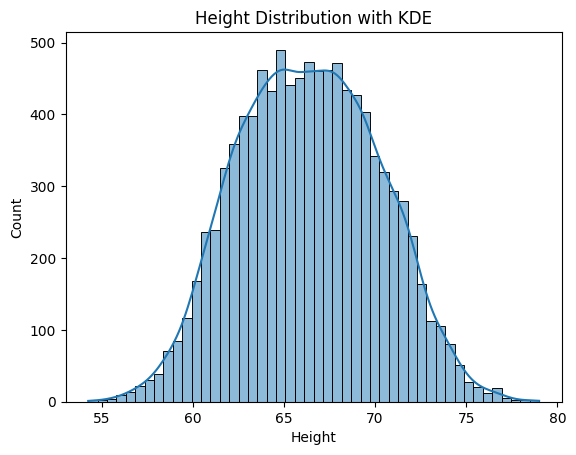

In [14]:
# Histogram with normal curve overlay

# Height Distribution
sns.histplot(df['Height'], kde=True)
plt.title("Height Distribution with KDE")
plt.show()

In [15]:
# Checking for normalcy of weight distribution

from scipy.stats import shapiro

stat, p = shapiro(df['Weight'])
print(f'Statistic: {stat:2f}, P-value: {p:2f}')

Statistic: 0.986247, P-value: 0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
from scipy.stats import kstest
import numpy as np

# Perform the Kolmogorov-Smirnov test

# Applying the Kolmogorov-Smirnov Test
ks_stat, p_value = kstest(df['Height'], 'norm', args=(np.mean(df['Height']), np.std(df['Height'])))

print(f"K-S Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data does not follow a normal distribution.")


K-S Statistic: 0.025554169260266657
P-value: 4.177451410608377e-06
Data does not follow a normal distribution.


In [17]:
# Dataset weight :: Shapiro-Wilk test results
p_value = 0.05

print("------------------------------------------------------------------------------------------------------------------------")
print("Interpretation :: Weight")
print("------------------------------------------------------------------------------------------------------------------------")

print("------------------------------------------------------------------------------------------------------------------------")
if p > p_value:
    print("The data is considered normally distributed.")
else:
    print("The data is not considered normally distributed.")
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
Interpretation :: Weight
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The data is not considered normally distributed.
------------------------------------------------------------------------------------------------------------------------


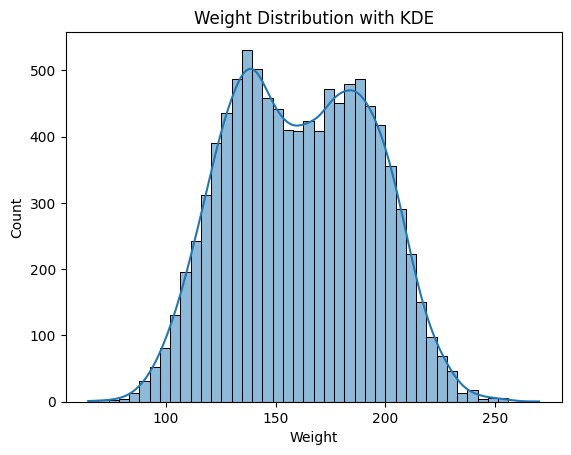

In [18]:
# Histogram with normal curve overlay

# Weight Distribution
sns.histplot(df['Weight'], kde=True)
plt.title("Weight Distribution with KDE")
plt.show()

## Step 8 : Perform Correlation Analysis

In [19]:
# The data is not normally distributed, so we use Spearman correlation instead of Pearson correlation.
from scipy.stats import spearmanr, pearsonr

print("------------------------------------------------------------------------------------------------------------------------")
# Spearman Correlation (if non-normal)
corr, p = spearmanr(df['Height'], df['Weight'])
print(f'Spearman Correlation: {corr}, P-value: {p}')
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------
Spearman Correlation: 0.9257076644210767, P-value: 0.0
------------------------------------------------------------------------------------------------------------------------


In [20]:
# Dataset height :: Spearman Correlation test results
p_value = 0.05
corr_value = 0

print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("Interpretation :: Spearman Correlation")
print("-------------------------------------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

if corr > corr_value:
    print("Correlation Result: There is a strong positive monotonic relationship (as one variable increases, the other always increases).")

elif corr < corr_value:
    print("Correlation Result: There is a strong negative monotonic relationship (as one variable increases, the other always decreases).")

else:
    print("Correlation Result: There is no monotonic relationship between height and weight.")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

print("-------------------------------------------------------------------------------------------------------------------------------------------")
if p > p_value:
    print("P-value Result: There is no significant relationship between height and weight.")
else:
    print("P-value Result: There is a significant relationship between height and weight.")
print("-------------------------------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------------------------------
Interpretation :: Spearman Correlation
-------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------
Correlation Result: There is a strong positive monotonic relationship (as one variable increases, the other always increases).
-------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------
P-value Result: There is a significant relationship between height and weight.
-------------------------------------------------------

## Step 9 : Visualize correlation result :: Scatter plot

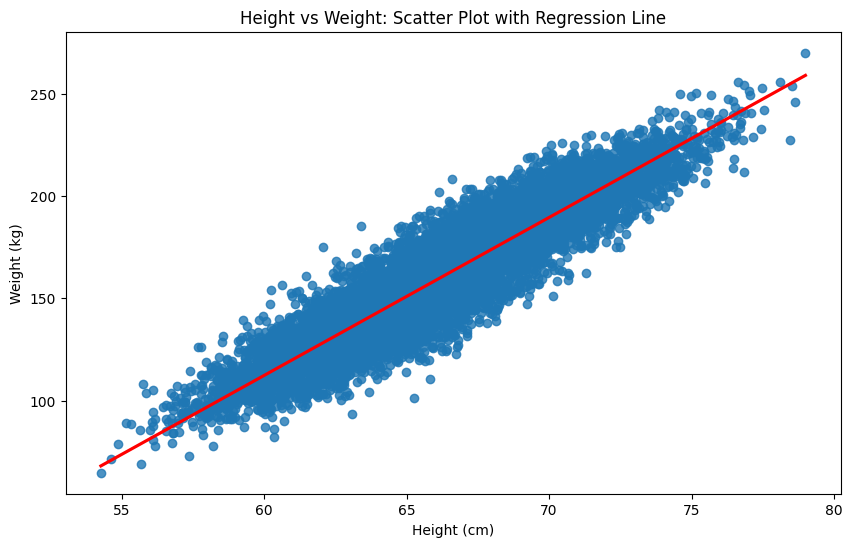

In [21]:
# Scatter Plot with Regression Line

plt.figure(figsize=(10, 6))
sns.regplot(x=df['Height'], y=df['Weight'], line_kws={"color":"red"})
plt.title("Height vs Weight: Scatter Plot with Regression Line")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()